In [1]:
dict = {"students": ['Alice','Anna','Arlean','Betty','Bertha','Beatrice','Candice','Carol','Christa','Duncan','Derry','Dealy','Edward','Earl','Edwin'], 
         "courses": ['Physics','Physics','Physics', 'Math','Math','Math','Chem', 'Chem','Chem','Bio','Bio','Bio','Stat','Stat','Stat'],
         "percent": [95,85,70,75,82,90,87,61,72,55,98,86, 56,78,86],
         "ID":  ['121', '122','123','124','125','126','127', '128','129','130','131','132','133', '134','135'],
         "phoneX": [842, 611, 624, 112, 383, 812, 842, 611, 624, 112, 383, 812,112, 383, 812]}
print(dict) # print out the dictionary 

{'students': ['Alice', 'Anna', 'Arlean', 'Betty', 'Bertha', 'Beatrice', 'Candice', 'Carol', 'Christa', 'Duncan', 'Derry', 'Dealy', 'Edward', 'Earl', 'Edwin'], 'courses': ['Physics', 'Physics', 'Physics', 'Math', 'Math', 'Math', 'Chem', 'Chem', 'Chem', 'Bio', 'Bio', 'Bio', 'Stat', 'Stat', 'Stat'], 'percent': [95, 85, 70, 75, 82, 90, 87, 61, 72, 55, 98, 86, 56, 78, 86], 'ID': ['121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135'], 'phoneX': [842, 611, 624, 112, 383, 812, 842, 611, 624, 112, 383, 812, 112, 383, 812]}


In [2]:
import pandas as pd  # let pd be the alias for pandas
school = pd.DataFrame(dict) # create the dataframe and assign it to the label school
school                      # a simple way to print out the entire dataframe

,students,courses,percent,ID,phoneX
0,Alice,Physics,95,121,842
1,Anna,Physics,85,122,611
2,Arlean,Physics,70,123,624
3,Betty,Math,75,124,112
4,Bertha,Math,82,125,383
5,Beatrice,Math,90,126,812
6,Candice,Chem,87,127,842
7,Carol,Chem,61,128,611
8,Christa,Chem,72,129,624
9,Duncan,Bio,55,130,112


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Jupter notebook specific
%matplotlib inline

In [4]:
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel('Athletic.xls', sheet_name='Sheet1')

#Please note for some versions of Jupyter Notebook, the above line may give an error or a warning. If this is the case
#please comment out the line 4 using a # and then remove the # in the following line below to enable it. 
#You can then save this file and try to run it again.

#df = pd.read_excel('Athletic.xls', sheetname='Sheet1')

print("Column headings:")
print(df.columns)

Column headings:
Index(['student', 'Sport', 'Score', 'Height', 'Weight', 'Fitness'], dtype='object')


In [5]:
df[['student']]

,student
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [6]:
df

,student,Sport,Score,Height,Weight,Fitness
0,1,Football,67,172,220,95
1,2,Football,78,168,243,90
2,3,Football,85,154,257,92
3,4,Football,82,176,242,94
4,5,Football,72,162,251,90
5,6,Tennis,78,159,160,88
6,7,Tennis,65,167,170,82
7,8,Tennis,58,179,157,79
8,9,Tennis,85,166,160,85
9,10,Tennis,90,164,162,85


<AxesSubplot:xlabel='Score'>

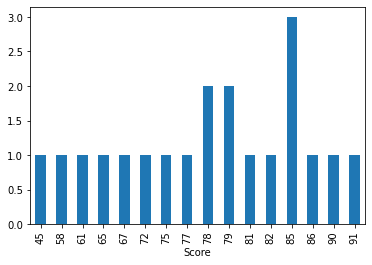

In [7]:
score_group = df.groupby('Score')
score_group.size().plot(kind='bar')

<AxesSubplot:xlabel='Sport'>

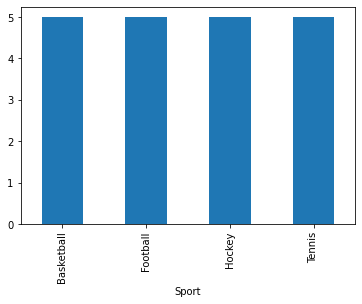

In [8]:
sport_group = df.groupby('Sport')
sport_group.size().plot(kind='bar')

In [9]:
athlete_group = df.groupby('Sport')['Fitness']
athlete_group.mean()

Sport
Basketball    79.0
Football      92.2
Hockey        97.2
Tennis        83.8
Name: Fitness, dtype: float64

In [10]:
athlete_group = df.groupby('Sport')['Fitness'].agg(['mean']).reset_index()
athlete_group

,Sport,mean
0,Basketball,79.0
1,Football,92.2
2,Hockey,97.2
3,Tennis,83.8


In [11]:
athlete_group = df.groupby('Sport')['Weight'].agg(['sum','count','mean']).reset_index()
athlete_group

,Sport,sum,count,mean
0,Basketball,922,5,184.4
1,Football,1213,5,242.6
2,Hockey,858,5,171.6
3,Tennis,809,5,161.8


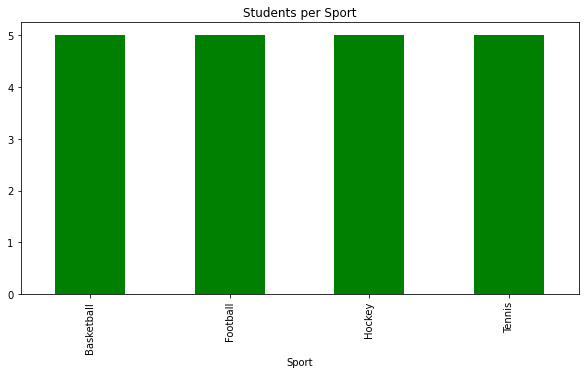

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Jupter notebook specific
%matplotlib inline

# Adjust plot size
plt.rcParams["figure.figsize"] = (10,5)

# Group Athlete data by sport and create bar graph of students per sport
df.groupby('Sport').count().reset_index().plot(x = 'Sport', 
                                               y = 'student',
                                               kind = 'bar',
                                               color = 'green',
                                               legend = False,
                                               title = 'Students per Sport');

Text(0.5, 0, 'Sports')

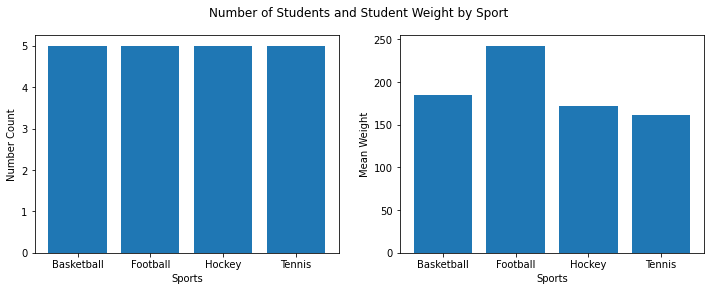

In [17]:
#fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=False)  1 = number of rows of plots, 2 = number of columns of plots
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=False) # sharey = false means do not share y-axis 

axs[0].bar(athlete_group['Sport'], athlete_group['count'])
axs[1].bar(athlete_group['Sport'], athlete_group['mean'])

fig.suptitle('Number of Students and Student Weight by Sport');
axs[0].set_ylabel('Number Count')
axs[1].set_ylabel('Mean Weight')
axs[0].set_xlabel('Sports')
axs[1].set_xlabel('Sports')

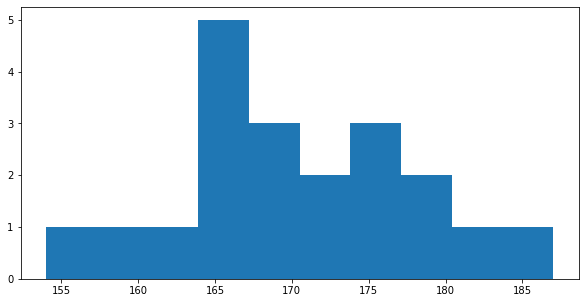

In [18]:
plt.hist(df['Height'], bins = 10);

Text(0.5, 0, 'Weight')

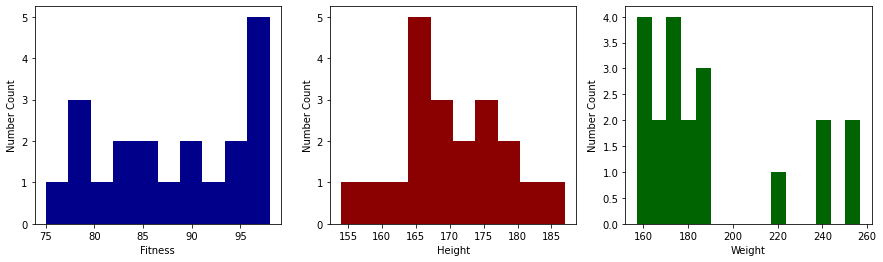

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=False, sharex = False)
axs[0].hist(df['Fitness'], bins = 10, color = 'darkblue')
axs[1].hist(df['Height'], bins = 10, color = 'darkred')
axs[2].hist(df['Weight'], bins = 15, color = 'darkgreen');

axs[0].set_ylabel('Number Count')
axs[1].set_ylabel('Number Count')
axs[2].set_ylabel('Number Count')
axs[0].set_xlabel('Fitness')
axs[1].set_xlabel('Height')
axs[2].set_xlabel('Weight')

In [20]:
trees = pd.read_json("http://data.cityofnewyork.us/resource/5rq2-4hqu.json")
trees = trees.drop(['zip_city', 'x_sp', 'y_sp', 'brnch_ligh', 'brnch_othe', 'brnch_shoe',
                    'the_geom', 'trnk_light', 'trnk_other', 'trnk_wire', 'boro_ct', 'borocode',
                    'cb_num', 'spc_latin', 'st_assem', 'st_senate', 'steward', 'state', 'sidewalk', 
                    'block_id', 'nta', 'nta_name', 'problems'], 
                    axis = 'columns')

trees.head()

,created_at,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,guards,user_type,root_stone,root_grate,root_other,address,zipcode,boroname,cncldist,latitude,longitude
0,2015-08-27,180683,3,0,OnCurb,Alive,Fair,red maple,None,TreesCount Staff,No,No,No,108-005 70 AVENUE,11375,Queens,29,40.723092,-73.844215
1,2015-09-03,200540,21,0,OnCurb,Alive,Fair,pin oak,None,TreesCount Staff,Yes,No,No,147-074 7 AVENUE,11357,Queens,19,40.794111,-73.818679
2,2015-09-05,204026,3,0,OnCurb,Alive,Good,honeylocust,None,Volunteer,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,34,40.717581,-73.936608
3,2015-09-05,204337,10,0,OnCurb,Alive,Good,honeylocust,None,Volunteer,Yes,No,No,1027 GRAND STREET,11211,Brooklyn,34,40.713537,-73.934456
4,2015-08-30,189565,21,0,OnCurb,Alive,Good,American linden,None,Volunteer,Yes,No,No,603 6 STREET,11215,Brooklyn,39,40.666778,-73.975979


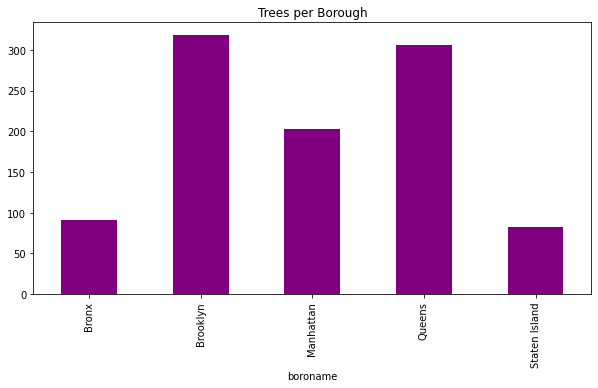

In [21]:
# Adjust plot size
plt.rcParams["figure.figsize"] = (10,5)

# Group trees data and create bar graph of trees per borough
trees.groupby('boroname').count().reset_index().plot(x = 'boroname', 
                                                     y = 'tree_id', 
                                                     kind = 'bar',
                                                     color = 'purple',
                                                     legend = False,
                                                     title = 'Trees per Borough');